In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
# base_dir = 'datasets/UTKFace'
base_dir = 'mimiDataSet'

In [3]:
images = os.listdir(base_dir)

In [4]:
images[0].split('_')

['1', '0', '0', '20161219140623097.jpg.chip.jpg']

In [5]:
image_paths = []
age_label = []
gender_label = []

for filename in images:
    image_path = os.path.join(base_dir, filename)
    temp = filename.split('_')

    if str(temp[0]).isnumeric():
        image_paths.append(image_path)
        age_label.append(int(temp[0]))


In [6]:
def make_dataset(images):
    features = []  # لیست برای نگه داشتن تصاویر پردازش‌شده

    for image in images:
        # مرحله 1: بارگذاری تصویر با اندازه مشخص و رنگ RGB
        img = load_img(
            image,
            target_size=(128, 128),
            color_mode='rgb',
            interpolation='lanczos',
        )

        # مرحله 2: تبدیل به آرایه numpy
        img_array = img_to_array(img)

        # مرحله 3: نرمال‌سازی (مقدار پیکسل‌ها بین 0 تا 1)
        img_array = img_array / 255.0

        # مرحله 4: اضافه کردن به لیست (بدون expand_dims)
        features.append(img_array)

    # مرحله 5: تبدیل لیست به آرایه numpy با شکل (N, 128, 128, 3)
    features = np.array(features)

    return features


In [7]:
x = make_dataset(image_paths)
x.shape

(168, 128, 128, 3)

In [8]:
y = np.array(age_label)
y.shape

(168,)

In [9]:
model = Sequential()

model.add(Input(shape=(128, 128, 3)))  # تعریف ورودی به صورت جداگانه

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(units=132, activation='relu'))

model.add(Dense(1))  # خروجی نهایی

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 132)            │        33,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,473 (1.61 MB)

 Trainable params: 422,473 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='mse', optimizer='adam' , metrics=['accuracy'] )

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 393ms/step - accuracy: 0.1022 - loss: 1591.3124 - val_accuracy: 0.4412 - val_loss: 983.5904
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.3650 - loss: 959.3552 - val_accuracy: 0.4412 - val_loss: 1144.8796
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.2882 - loss: 765.4088 - val_accuracy: 0.4412 - val_loss: 744.6897
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.3164 - loss: 897.0787 - val_accuracy: 0.4412 - val_loss: 771.3438
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.3533 - loss: 781.0522 - val_accuracy: 0.4412 - val_loss: 979.8862
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.3520 - loss: 818.5612 - val_accuracy: 0.4412 - val_loss: 659.1447
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.3346 - loss: 685.3634 - val_accuracy: 0.4412 - val_loss: 652.8152
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.3567 - loss: 648.5693 - 

In [12]:
# keras.saving.save_model(model, 'my_model.keras')

🎯 Original Age: 59
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
🤖 Predicted Age: 33


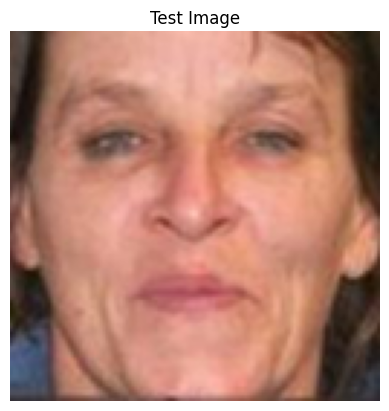

In [13]:
import matplotlib.pyplot as plt

image_index = 4

# نمایش مقدار واقعی
print("🎯 Original Age:", y_test[image_index])

# پیش‌بینی سن
pred = model.predict(x_test[image_index].reshape(1, 128, 128, 3))

print("🤖 Predicted Age:", int(pred[0][0]))

# نمایش تصویر
plt.imshow(x_test[image_index])
plt.axis('off')
plt.title("Test Image")
plt.show()


In [14]:
def make_test(images):
    features = []  # لیستی برای نگه داشتن همه‌ی تصاویر پردازش‌شده

    # Step 1: Load the image
    img = load_img(
        images,
        target_size=(128, 128),
        color_mode='rgb',
        interpolation='lanczos',
    )

    # Step 2: Convert to numpy array
    img_array = img_to_array(img)

    # Step 3: Normalize (اختیاری ولی معمول برای شبکه‌های عصبی)
    img_array = img_array / 255.0

    # Step 4: Expand dimensions (اگر می‌خوای با مدل Keras استفاده کنی)
    img_array = np.expand_dims(img_array, axis=0)

    # Step 5: Add to features
    features.append(img_array)

    # Optional: Merge all into a single array with shape (N, 128, 128, 3)
    features = np.vstack(features)

    return features

In [15]:
test1 = make_test('test.jpg')